In [2]:
import pandas as pd
import numpy as np
import glob
import time

import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
data = pd.read_csv('data.csv')

Index(['date', 'exh', 'ext', 'hum', 'rec', 'sup', 'energy', 'sup_diff', 'kwh',
       'rmot', 'rmit', 'rmoh', 'z'],
      dtype='object')


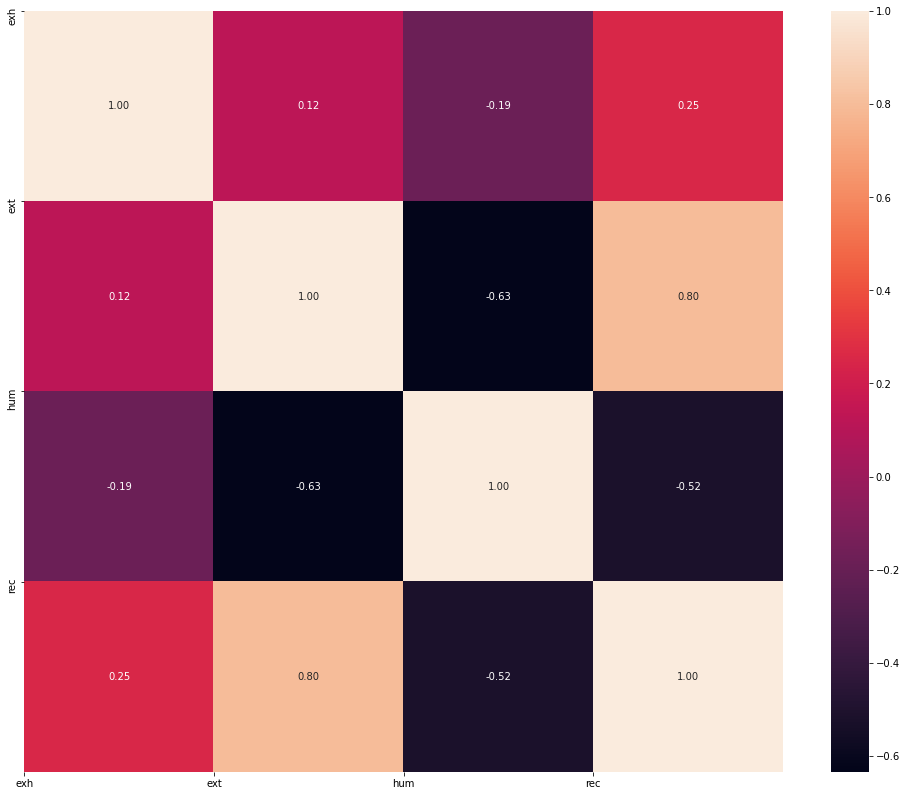

In [5]:
def GenerateProfile(data, title_name, title_output):

    profile = ProfileReport(data, title=title_name)
    profile.to_file(output_file=title_output)

def CorrelationMap():
    
    print(data.columns)

    DC = data.iloc[:, 1:5]
    CRLN = DC.corr()

    f, ax = plt.subplots(figsize=(17, 14))
    sns.heatmap(CRLN, annot=True, fmt=".2f")
    plt.xticks(range(len(CRLN.columns)), CRLN.columns)
    plt.yticks(range(len(CRLN.columns)), CRLN.columns)
    plt.show()

CorrelationMap()

In [39]:
dat = pd.DataFrame.copy(data, deep=True)
dat['date'] = pd.to_datetime(dat['date'])
dat = dat.set_index(['date'])

first_three = [1, 2, 3]
second_three = [4, 5, 6]
third_three = [7, 8, 9]
fourth_three = [10, 11, 12]

dat = dat.resample('D').sum()

# Extract monthly data.
jan_to_mar = dat[dat.index.to_series().dt.month.isin(first_three)]
apr_to_jun = dat[dat.index.to_series().dt.month.isin(second_three)]
jul_to_sep = dat[dat.index.to_series().dt.month.isin(third_three)]
okt_to_dec = dat[dat.index.to_series().dt.month.isin(fourth_three)]

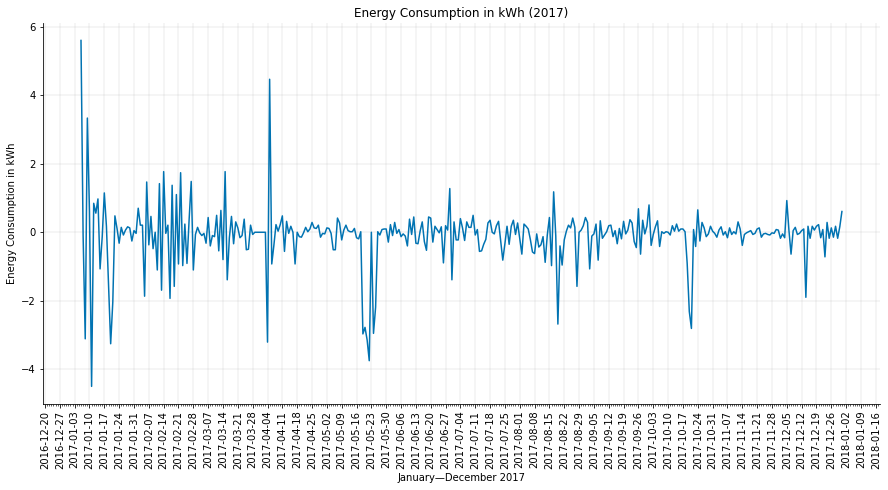

In [40]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(ax=ax, x=dat.index, y=dat['kwh'],
             data=dat).set_title('Energy Consumption in kWh (2017)')

# Sets the large ticks at the beginning of each week.
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# Sets the rotation degree for readability.
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

plt.xlabel('January—December 2017')
plt.ylabel('Energy Consumption in kWh')

plt.grid(linewidth=0.25)
sns.set_palette('colorblind')
sns.despine()

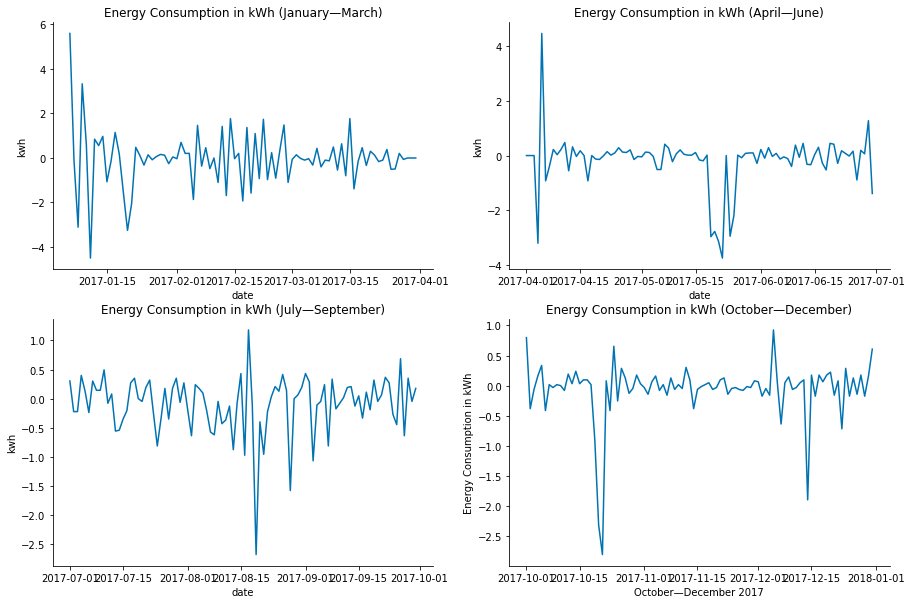

In [41]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))

# This code can be optimised.
sns.lineplot(ax=ax[0][0], x='date', y='kwh',
             data=jan_to_mar).set_title('Energy Consumption in kWh (January—March)')
plt.xlabel('January—March 2017')
plt.ylabel('Energy Consumption in kWh')
sns.lineplot(ax=ax[0][1], x='date', y='kwh', 
             data=apr_to_jun).set_title('Energy Consumption in kWh (April—June)')
plt.xlabel('April—June 2017')
plt.ylabel('Energy Consumption in kWh')
sns.lineplot(ax=ax[1][0], x='date', y='kwh', 
             data=jul_to_sep).set_title('Energy Consumption in kWh (July—September)')
plt.xlabel('July—September 2017')
plt.ylabel('Energy Consumption in kWh')
sns.lineplot(ax=ax[1][1], x='date', y='kwh', 
             data=okt_to_dec).set_title('Energy Consumption in kWh (October—December)')              
plt.xlabel('October—December 2017')
plt.ylabel('Energy Consumption in kWh')   

sns.despine()